In [32]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [33]:
result1 = bilby.result.read_in_result("TaylorF2EccFD3PN_lal_eccentric_binary_black_hole_no_spins_data0_1187008882-43_analysis_H1L1V1_result.hdf5")

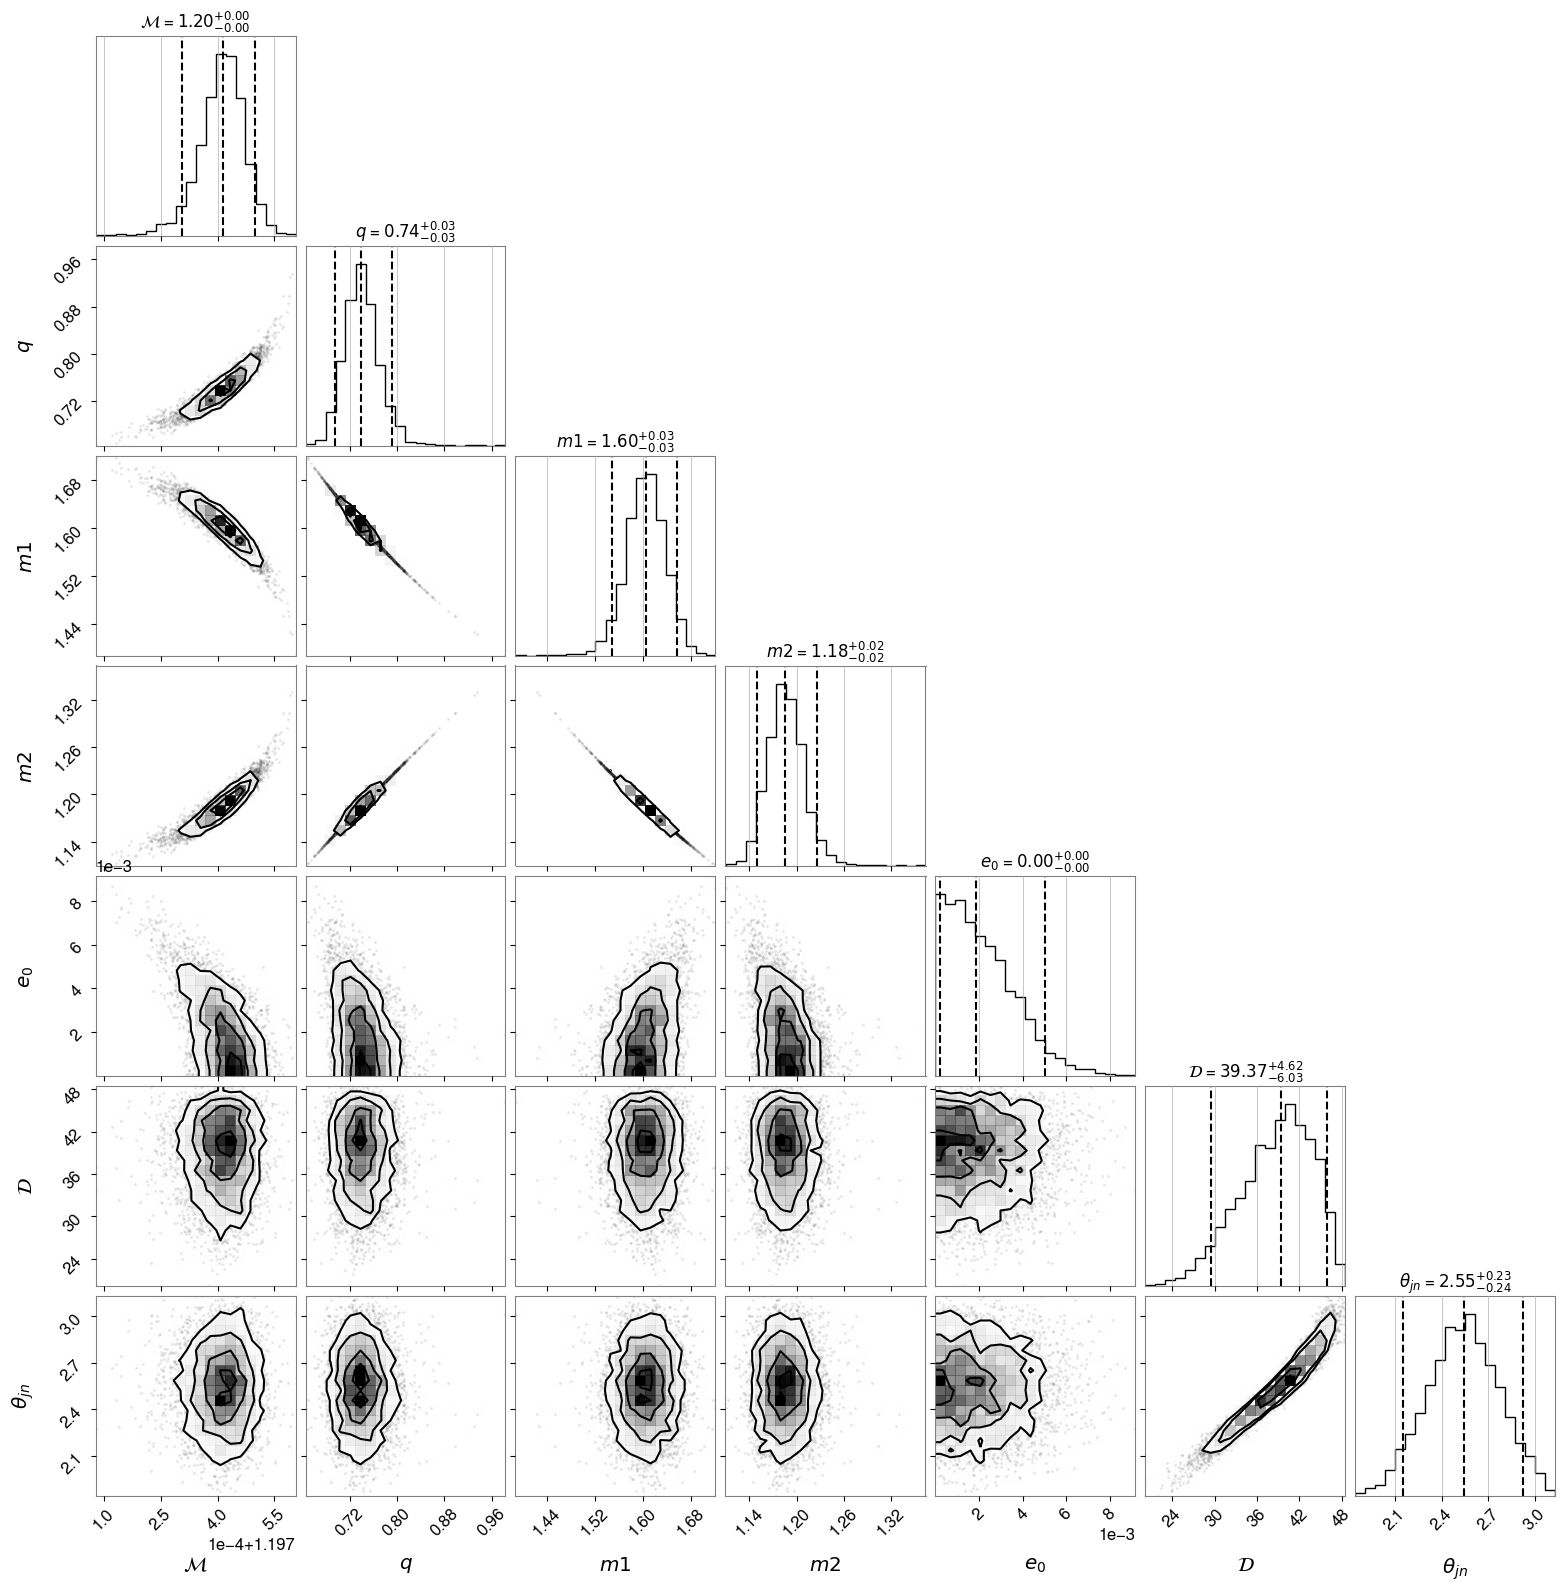

In [34]:
chirp_mass1 = result1.posterior["chirp_mass"].values
mass_ratio1 =  result1.posterior["mass_ratio"].values
e01 = result1.posterior["eccentricity"].values
theta_jn1 = result1.posterior["theta_jn"].values
D1 = result1.posterior["luminosity_distance"].values
ra1 = result1.posterior["ra"].values
dec1 = result1.posterior["dec"].values

m11 = (chirp_mass1*(1+mass_ratio1)**(1/5))/mass_ratio1**(3/5)
m21 = chirp_mass1*mass_ratio1**(2/5)*(1+mass_ratio1)**(1/5)

data1 = np.transpose(np.array([chirp_mass1,mass_ratio1,m11,m21,e01,D1,theta_jn1]))
figure = corner.corner(data1, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

In [35]:
result2 = bilby.result.read_in_result("TaylorF2EccPerAdvFDLeO20Hz_GW170817_data0_1187008882-43_analysis_H1L1V1_result.hdf5")

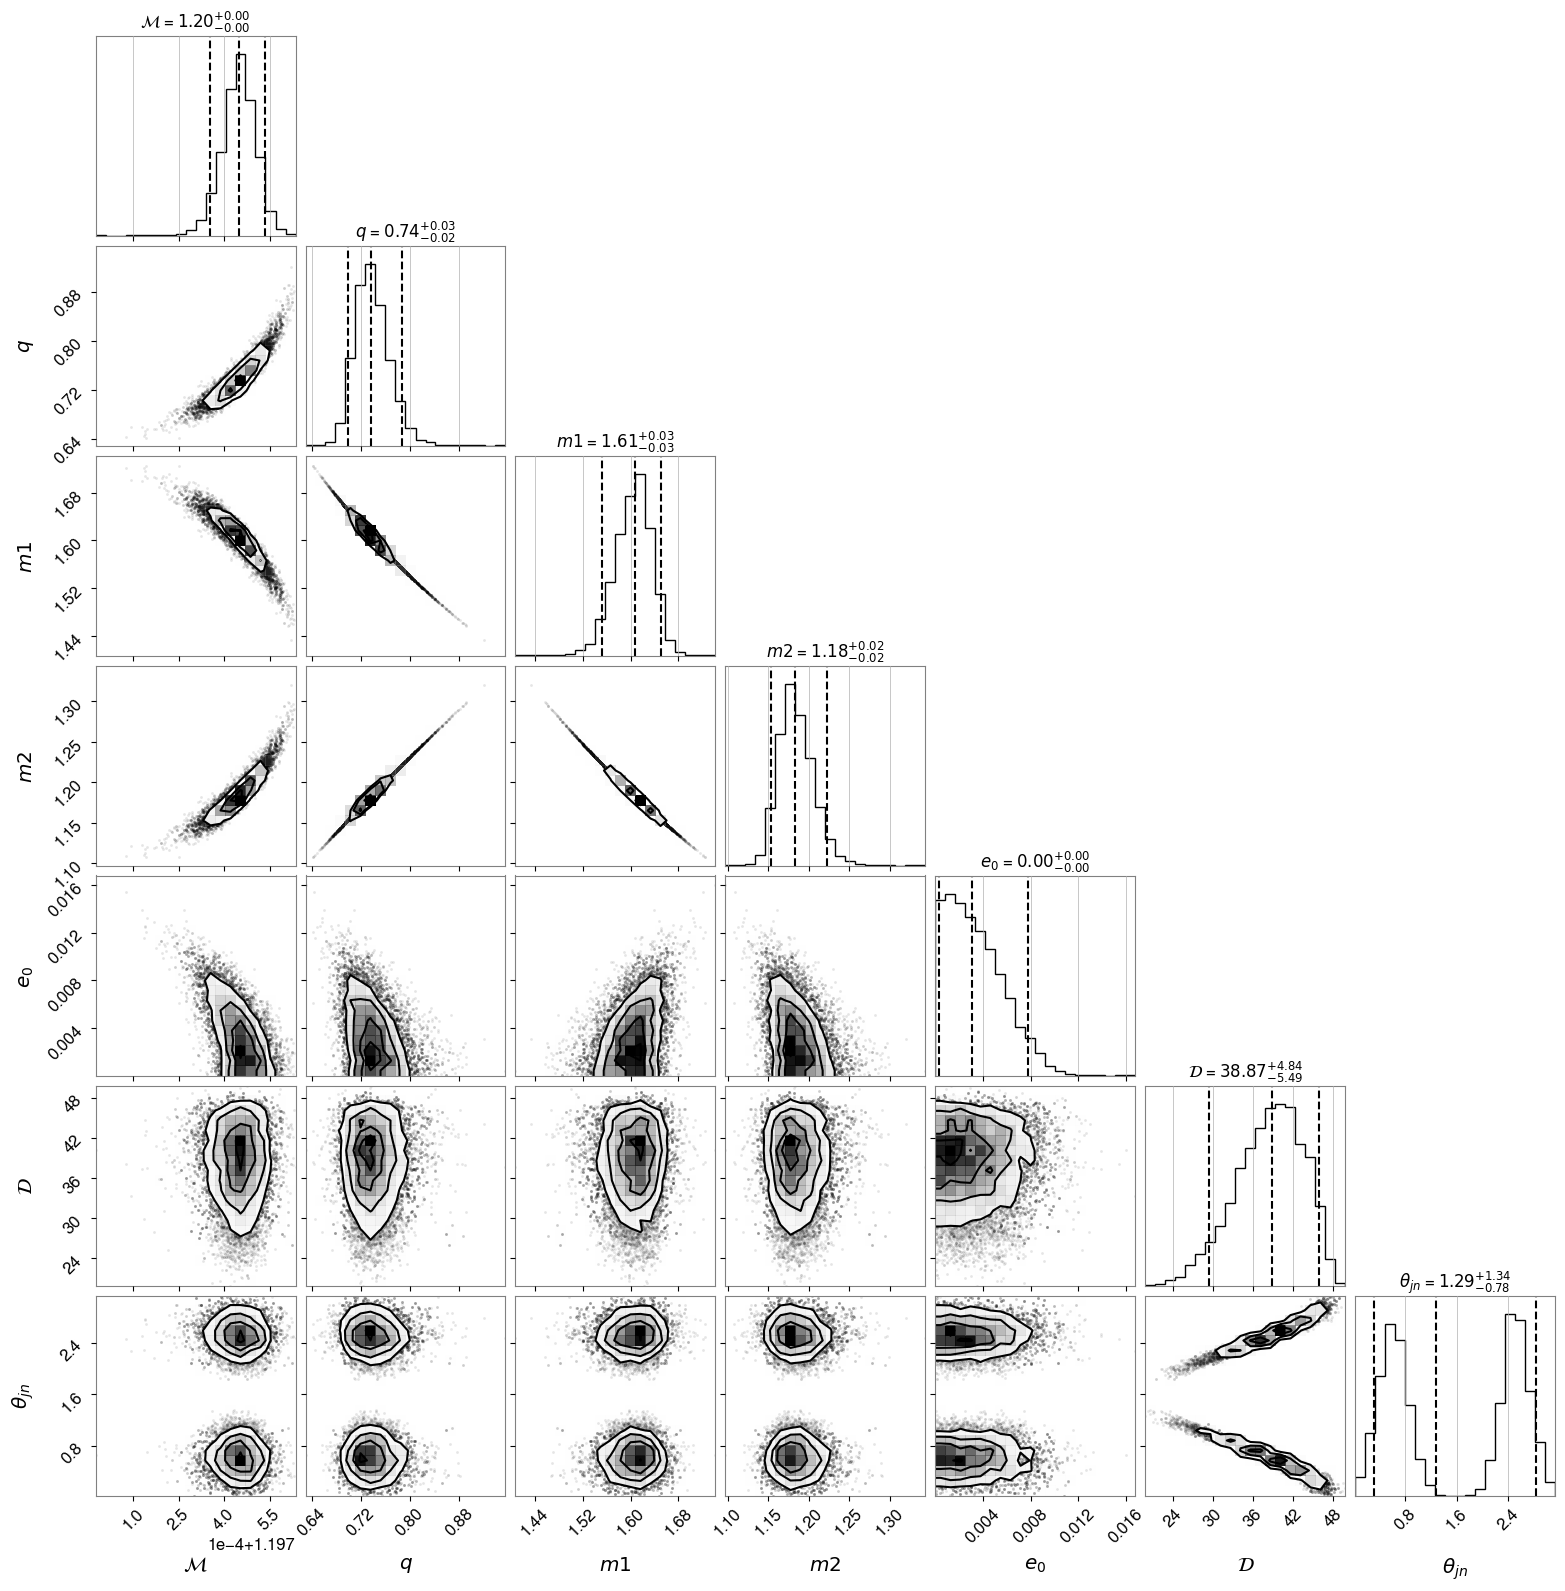

In [36]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass2 = result2.posterior["chirp_mass"].values
mass_ratio2 =  result2.posterior["mass_ratio"].values
e02 = result2.posterior["eccentricity"].values
theta_jn2 = result2.posterior["theta_jn"].values
D2 = result2.posterior["luminosity_distance"].values
ra2 = result2.posterior["ra"].values
dec2 = result2.posterior["dec"].values

m12 = (chirp_mass2*(1+mass_ratio2)**(1/5))/mass_ratio2**(3/5)
m22 = chirp_mass2*mass_ratio2**(2/5)*(1+mass_ratio2)**(1/5)

data2 = np.transpose(np.array([chirp_mass2,mass_ratio2,m12,m22,e02,D2,theta_jn2]))
figure = corner.corner(data2, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

# TaylorF2Ecc3PN

In [6]:
result1.log_10_bayes_factor

368.2821458962716

In [26]:
print(corner.quantile(mass_ratio1, [0.05, 0.5, 0.95]))
print(corner.quantile(chirp_mass1, [0.05, 0.5, 0.95]))

[0.69453919 0.73876527 0.79205997]
[1.1973071  1.19741466 1.19749856]


# PerAdv

In [7]:
result2.log_10_bayes_factor

370.31433330415314

In [27]:
print(corner.quantile(mass_ratio2, [0.05, 0.5, 0.95]))
print(corner.quantile(chirp_mass2, [0.05, 0.5, 0.95]))

[0.69839501 0.73590415 0.78724628]
[1.19735336 1.19744887 1.19753406]


# comparision

In [28]:
# delta q
corner.quantile(mass_ratio2, [0.05, 0.5, 0.95])[2]-corner.quantile(mass_ratio1, [0.05, 0.5, 0.95])[0]

0.09270709112251585

In [29]:
# delta chirp_mass
corner.quantile(chirp_mass2, [0.05, 0.5, 0.95])[2]-corner.quantile(chirp_mass1, [0.05, 0.5, 0.95])[0]

0.00022696120230425443

In [31]:
# log_10_bayes_factor
result2.log_10_bayes_factor-result1.log_10_bayes_factor

2.0321874078815654

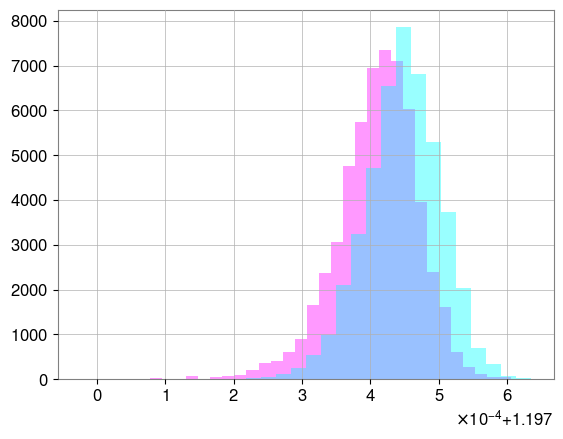

In [9]:
plt.hist(chirp_mass1, density=True, bins=30, alpha=0.4, color='magenta')
plt.hist(chirp_mass2, density=True, bins=30, alpha=0.4, color='cyan')
plt.show()

In [8]:
print(len(chirp_mass1),len(chirp_mass2))

4247 23830


In [10]:
num = 4247

In [11]:
buffer1 = np.random.choice(chirp_mass1,num)
a1 = np.array([])
b1 = np.array([])
for i in range(num):
    idx1 = np.argwhere(chirp_mass1==buffer1[i])[0,0]
    a1 = np.append(a1,chirp_mass1[idx1])
    b1 = np.append(b1,mass_ratio1[idx1])
    
buffer2 = np.random.choice(chirp_mass2,num)
a2 = np.array([])
b2 = np.array([])
for i in range(num):
    idx2 = np.argwhere(chirp_mass2==buffer2[i])[0,0]
    a2 = np.append(a2,chirp_mass2[idx2])
    b2 = np.append(b2,mass_ratio2[idx2])

In [12]:
data1 = np.transpose(np.array([a1,b1]))
data2 = np.transpose(np.array([a2,b2]))

In [13]:
CORNER_KWARGS = dict(
    bins=30,
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    quantiles=[0.05, 0.5, 0.95],
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    show_titles=True,
    #density=True,
    max_n_ticks=5,
    contourf_kwargs= dict(alpha=0.4),
)
CORNER_KWARGS2 = dict(
    bins=30,
    smooth=0.9,
    #label_kwargs=dict(fontsize=16),
    #title_kwargs=dict(fontsize=16),
    title_quantiles=None,
    quantiles=None,
    plot_density=False,
    plot_datapoints=False,
    fill_contours=False,
    #show_titles=True,
    #density=True,
    #max_n_ticks=3,
)


def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('tab10', 10 )
    colors = [cmap(i) for i in range(10)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS,
    )

    for idx in range(1, n):
        fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                #labels=[r"$\mathcal{M}$", r"$q$", r"$m_1$",r"$m_2$",r"$e_0$",r"$\phi_{ref}$"],
                labels=[r"$\mathcal{M}$", r"$q$"],
                color=colors[idx],
                contourf_kwargs= dict(alpha=0.4),
                **CORNER_KWARGS2)
        '''if idx==3: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS)
        else: 
            fig = corner.corner(
                samples_list[idx],
                fig=fig,
                weights=get_normalisation_weight(len(samples_list[idx]), max_len),
                labels=[r"$\mathcal{M}$", r"$q$",r"$e_0$"],
                color=colors[idx],
                **CORNER_KWARGS2)'''

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    figure = plt.gcf()
    figure.set_size_inches(7, 7)
    plt.savefig("corner10.png")
    plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

In [14]:
def main():

    overlaid_corner(
        [data2, data1],
        ["PerAdvFD","TaylorF2Ecc3PN"]
    )


if __name__ == "__main__":
    main()

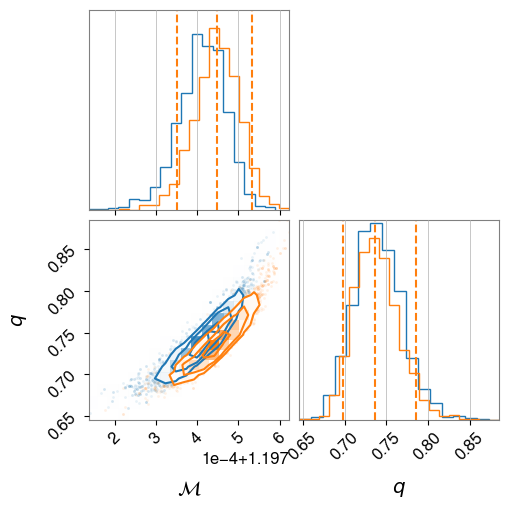

In [30]:
fig = corner.corner(data1,
                       color = 'C0')
corner.corner(data2, fig=fig, labels=[r"$\mathcal{M}$", r"$q$",r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
              quantiles=[0.05, 0.5, 0.95],
                       color = 'C1')

#fig = corner.corner(l1_ps_1[params],color = 'C0')
#corner.corner(l1_ps_2[params],fig=fig,color='C1')

plt.show()

* there is indeed improvement 
* check whether there is more improvement when e0=0.1